In [2]:
# Importing essential libraries for data manipulation and visualization
import pandas as pd              # Used for working with data in DataFrame format
import numpy as np               # Used for numerical operations
import seaborn as sns            # Used for advanced data visualizations
import matplotlib.pyplot as plt  # Used for basic plotting and visualization


In [3]:
# Reading the heart disease dataset from a CSV file
data = pd.read_csv("heart.csv")

# Displaying the first five rows of the dataset to understand its structure
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Checking for missing (null) values in each column of the dataset
data.isnull().sum()

# This helps identify if any data cleaning is required before analysis


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Getting a summary of the dataset, including data types, non-null counts, and memory usage
data.info()

# Useful for understanding the structure and completeness of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Generating descriptive statistics for numerical columns in the dataset
data.describe()

# Includes count, mean, standard deviation, min, max, and percentiles for each feature


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Checking the distribution of the target variable "target" (1 = heart disease, 0 = no heart disease)
data["target"].value_counts()

# Helps understand the class balance in the dataset


target
1    526
0    499
Name: count, dtype: int64

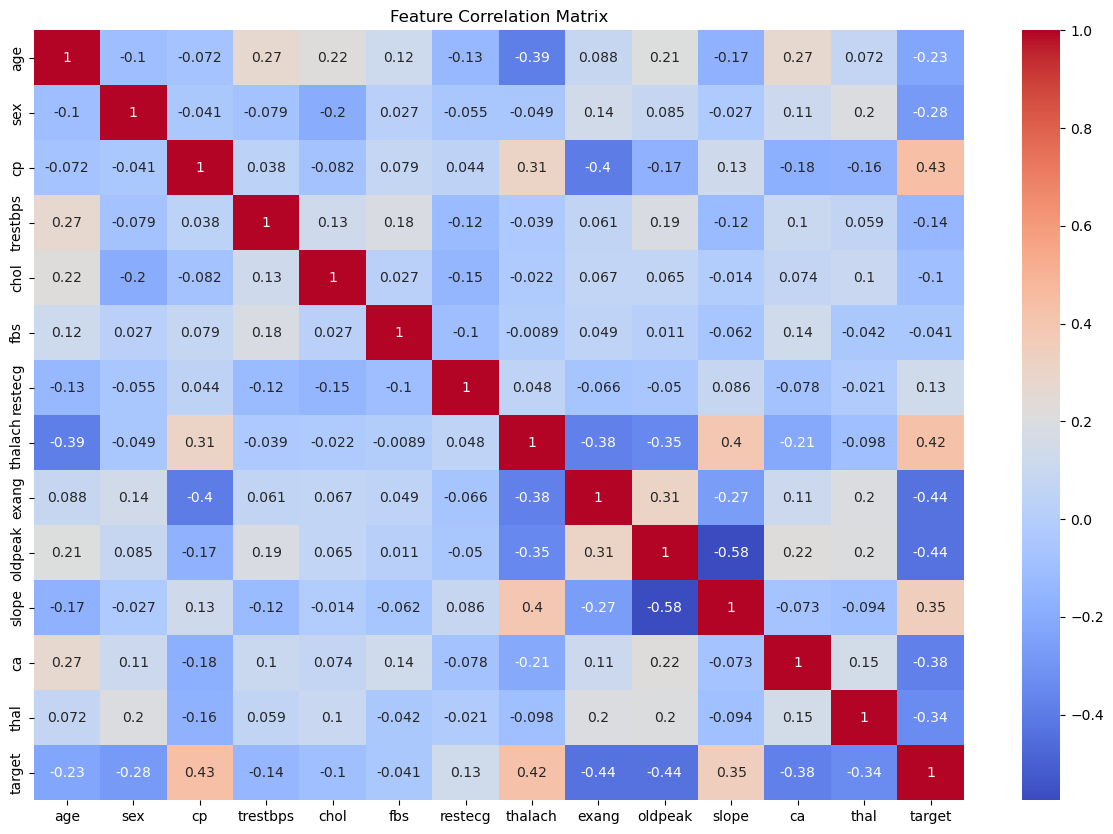

In [8]:
# Creating a heatmap to visualize the correlation between features
plt.figure(figsize=(15, 10))  # Setting the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  # Plotting the heatmap with annotations
plt.title("Feature Correlation Matrix")  # Adding a title
plt.show()

# This helps identify which features are strongly correlated with the target


In [9]:
# Separating the features (X) and the target variable (y)
X = data.drop("target", axis=1)  # Dropping the target column to keep only the input features
y = data["target"]               # Assigning the target column to variable y


In [10]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# 80% training, 20% testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Importing the Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# Creating an instance of the model with some default parameters
model = DecisionTreeClassifier()

# Training the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [12]:
# Making predictions on the test set
y_pred = model.predict(X_test)


In [13]:
# Evaluating the model's accuracy
from sklearn.metrics import accuracy_score

# Calculating accuracy by comparing predicted and actual test labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 98.54%


In [14]:
# Importing additional evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Generating a confusion matrix to analyze prediction results
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generating a classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



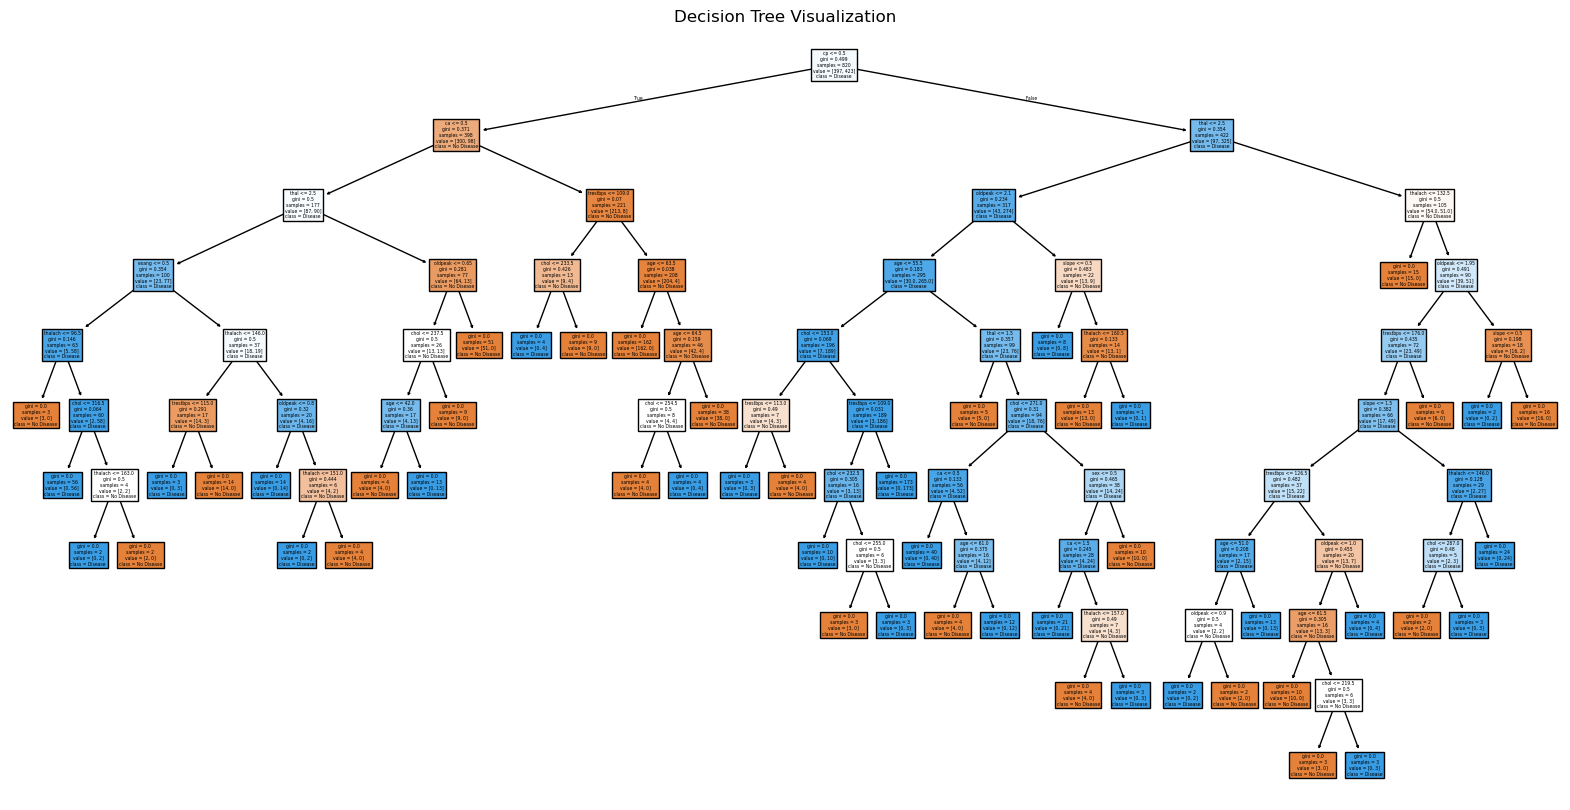

In [15]:
# Visualizing the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Set the figure size for better readability
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])  # Plot with labels
plt.title("Decision Tree Visualization")  # Add a title
plt.show()

# This provides a graphical representation of the decision-making process used by the model


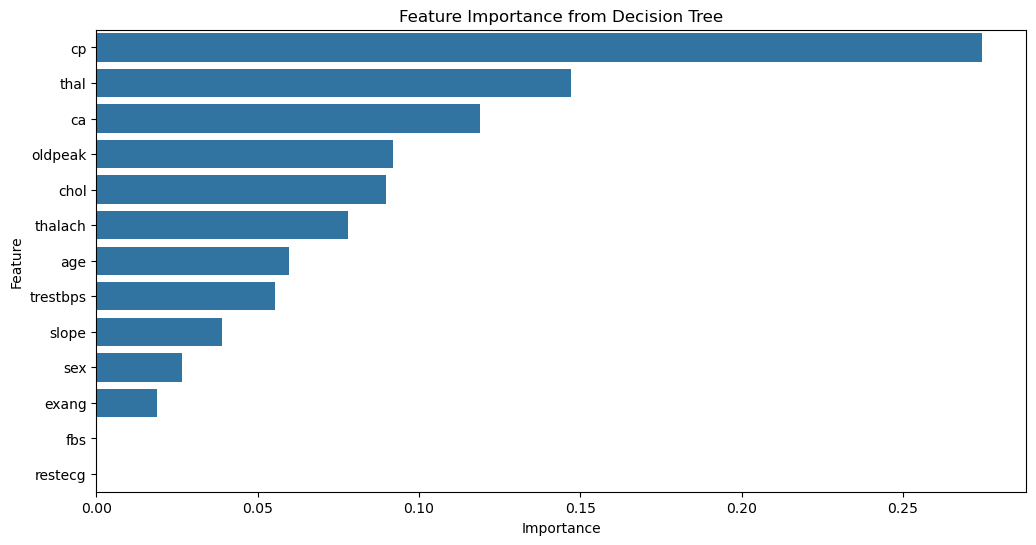

In [16]:
# Checking feature importances — which features influenced the decision tree the most
importances = model.feature_importances_

# Creating a DataFrame for better visualization of feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Decision Tree')
plt.show()

# Helps understand which features contribute the most to heart disease prediction


Decision Tree Results:
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Results:
Accuracy: 0.9854
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Gradient Boosting Results:
Accuracy: 0.9317
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.92      0.95      0.93 

<Figure size 1200x600 with 0 Axes>

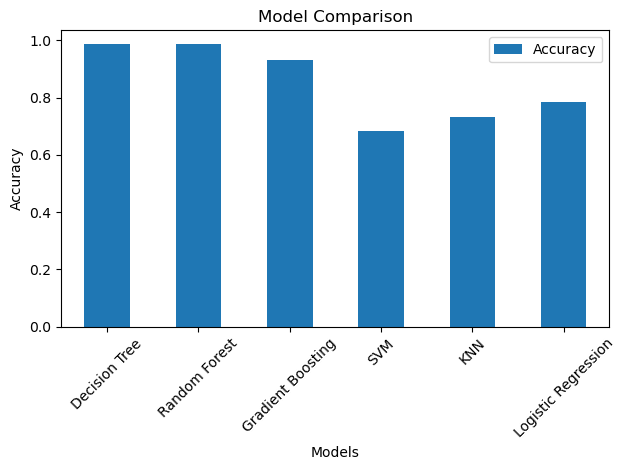

In [18]:
# Import necessary machine learning algorithms and evaluation tools
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models
from sklearn.svm import SVC                          # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation metrics

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Dictionary to store various machine learning models with their names
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),            # Decision Tree model
    'Random Forest': RandomForestClassifier(random_state=42),            # Random Forest model
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),    # Gradient Boosting model
    'SVM': SVC(random_state=42),                                         # Support Vector Machine model
    'KNN': KNeighborsClassifier(),                                       # K-Nearest Neighbors model
    'Logistic Regression': LogisticRegression(random_state=42)          # Logistic Regression model
}

# Initialize an empty dictionary to store accuracy results of each model
results = {}

# Loop through each model, train and evaluate it
for name, model in models.items():
    model.fit(X_train, y_train)                     # Train the model using the training data
    y_pred = model.predict(X_test)                  # Predict the target for the test data
    accuracy = accuracy_score(y_test, y_pred)       # Calculate accuracy of the predictions
    results[name] = accuracy                        # Store accuracy in the results dictionary

    # Print model name and its evaluation metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")              # Print the accuracy rounded to 4 decimals
    print("Classification Report:")
    print(classification_report(y_test, y_pred))    # Print precision, recall, f1-score, support

# Visualize the model performance comparison
plt.figure(figsize=(12, 6))  # Set the figure size for the plot

# Convert the results dictionary to a DataFrame for plotting
models_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

# Create a bar plot comparing the accuracy of all models
models_df.plot(kind='bar')
plt.title('Model Comparison')         # Title of the plot
plt.xlabel('Models')                  # Label for the x-axis
plt.ylabel('Accuracy')                # Label for the y-axis
plt.xticks(rotation=45)               # Rotate x-axis labels for better readability
plt.tight_layout()                    # Adjust layout to avoid clipping
plt.show()                            # Display the plot
